<a href="https://colab.research.google.com/github/Rushil-K/Deep-Learning---CNN-image-recognition/blob/main/nmrk2627_CNN_DLM_proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project 2 : CNN
Contributors:
- Navneet Mittal
- Rushil Kohli

### Analysis

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import zipfile
from google.colab import auth
from googleapiclient.discovery import build
import gdown

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision

# ✅ Enable mixed precision for faster training on T4 GPU
mixed_precision.set_global_policy('mixed_float16')

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize & reshape for CNN
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# ✅ Data Augmentation (only slight transformations for better accuracy)
datagen = ImageDataGenerator(
    rotation_range=10,   # Reduce rotation to avoid excessive distortion
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15
)
datagen.fit(x_train)

# ✅ Optimized CNN Model for T4 GPU
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax', dtype='float32')  # ✅ Ensure float32 for better accuracy
])

# Compile Model (using Adam with higher learning rate for fast convergence)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Train model (reduced to 10 epochs for faster training)
model.fit(datagen.flow(x_train, y_train, batch_size=128),
          validation_data=(x_test, y_test),
          epochs=10, verbose=1)

# Save trained model
model.save("mnist_cnn_t4_optimized.h5")
print("✅ Model training complete & saved!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - accuracy: 0.8060 - loss: 0.7399 - val_accuracy: 0.8695 - val_loss: 0.4174
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9581 - loss: 0.1413 - val_accuracy: 0.9700 - val_loss: 0.0975
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9674 - loss: 0.1145 - val_accuracy: 0.9856 - val_loss: 0.0457
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9685 - loss: 0.1079 - val_accuracy: 0.9718 - val_loss: 0.0955
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9762 - loss: 0.0826 - val_accuracy: 0.9922 - val_loss: 0.0237
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9777 - loss: 0.0778 - val_accuracy: 0.9905 - val_loss: 0.0306
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9804 - loss: 0.0709 - val_accuracy: 0.9913 - val_loss: 0.0279
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9793 - loss: 0.0704 - val_accurac

✅ Model training complete & saved!


In [5]:
# Google Drive file ID from your link
file_id = "1uuoLppbbYhM97nDNqV90q6ZmtttrPlJX"
zip_path = "/content/images.zip"

# Download the ZIP file
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_images')

image_folder = '/content/extracted_images'
print("Images extracted to:", image_folder)


Downloading...
From: https://drive.google.com/uc?id=1uuoLppbbYhM97nDNqV90q6ZmtttrPlJX
To: /content/images.zip
100%|██████████| 171k/171k [00:00<00:00, 78.8MB/s]

Images extracted to: /content/extracted_images


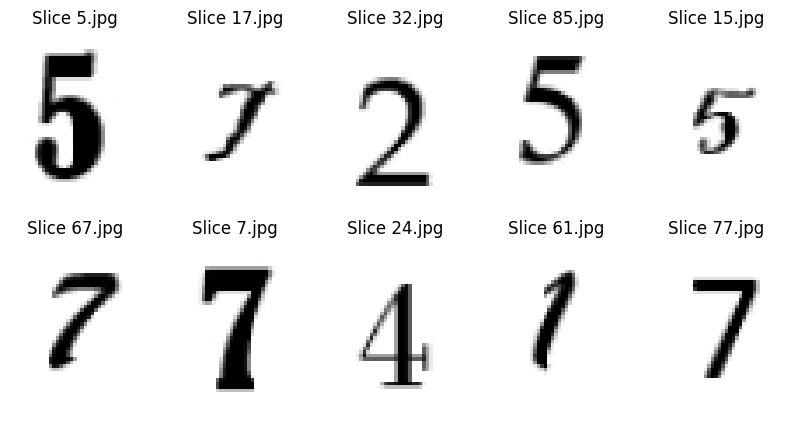

In [8]:
def display_extracted_images(folder_path, num_images=10):
    images = os.listdir(folder_path)[:num_images]

    plt.figure(figsize=(10, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

        plt.subplot(2, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(img_name)  # Show filename
        plt.axis('off')

    plt.show()

# Show images
display_extracted_images(image_folder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


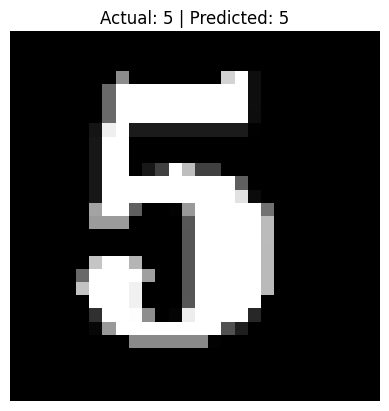

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


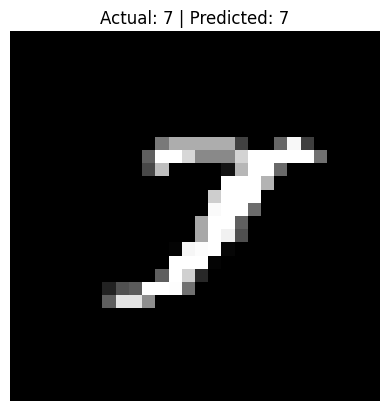

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


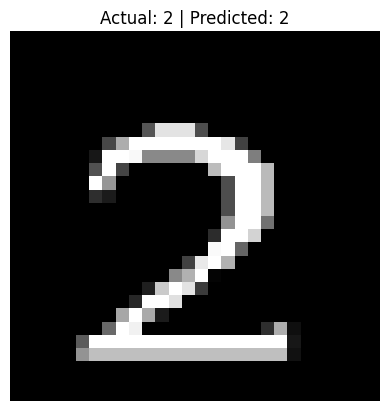

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


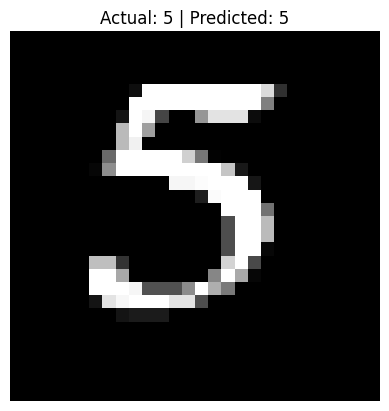

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


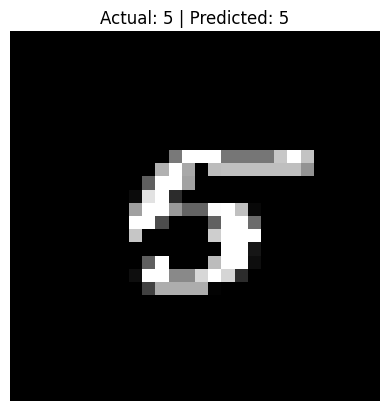

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


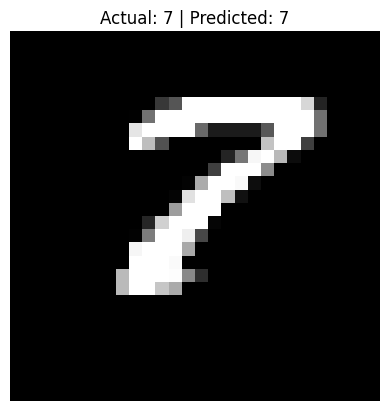

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


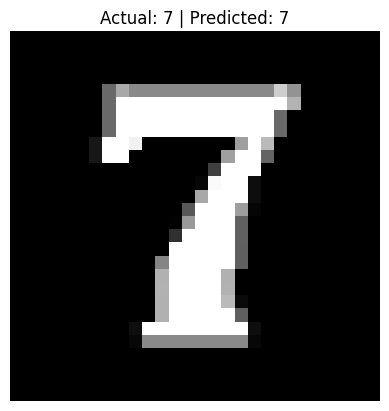

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


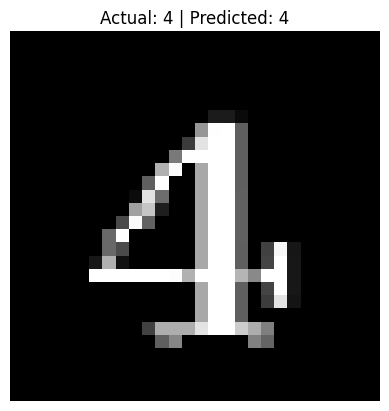

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


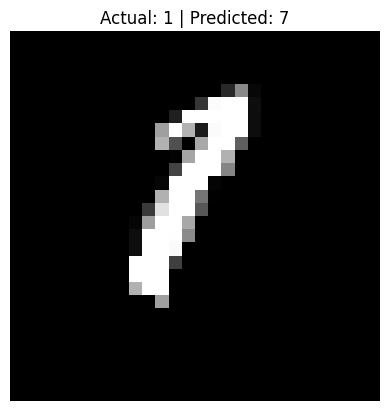

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


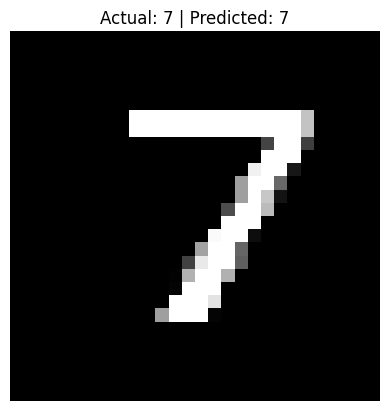

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


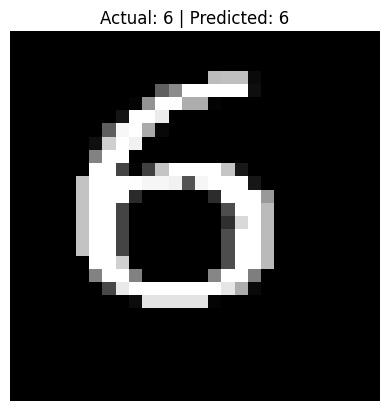

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


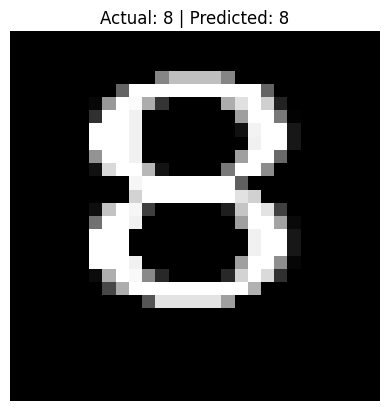

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


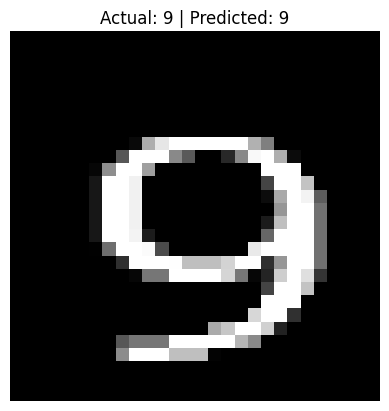

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


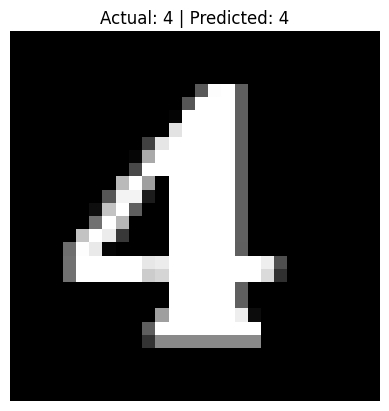

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


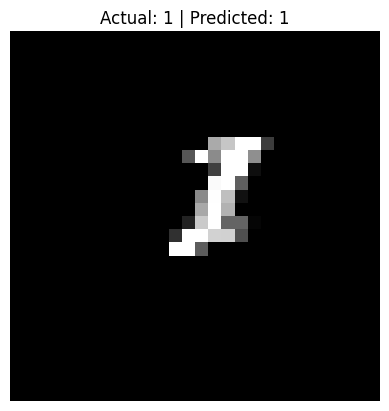

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


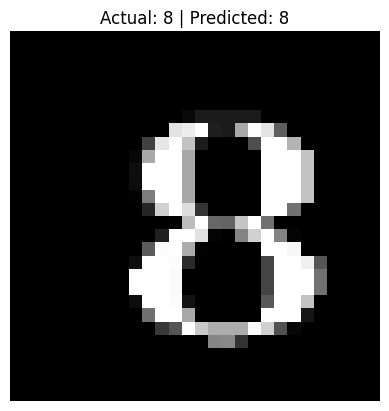

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


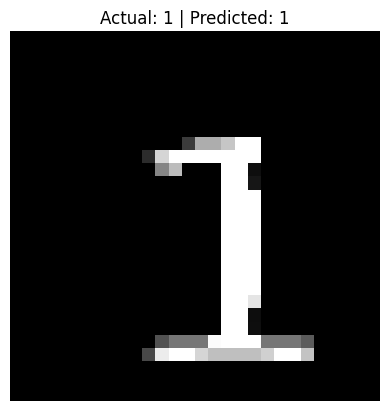

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


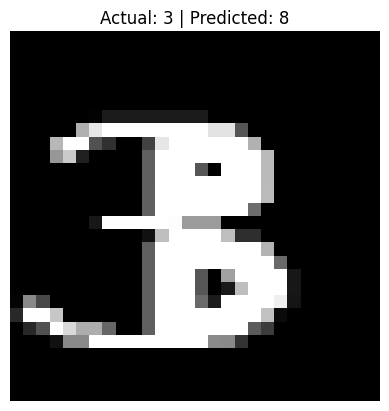

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


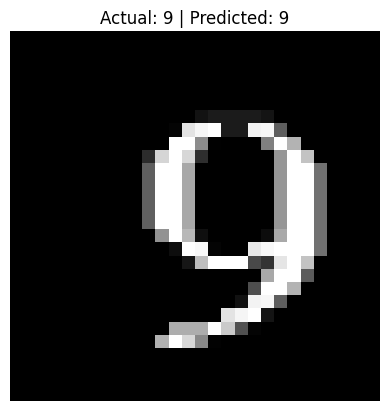

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


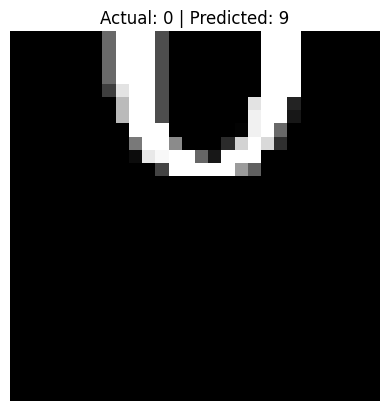

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


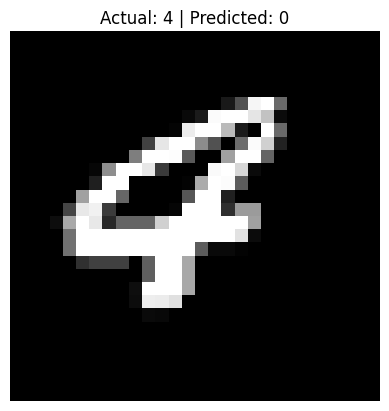

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


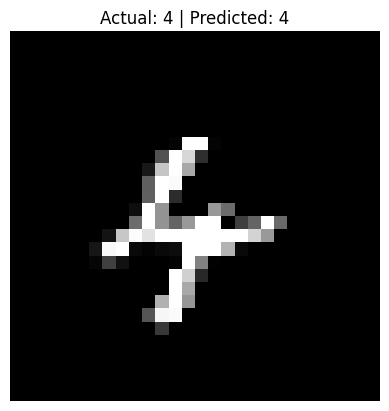

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


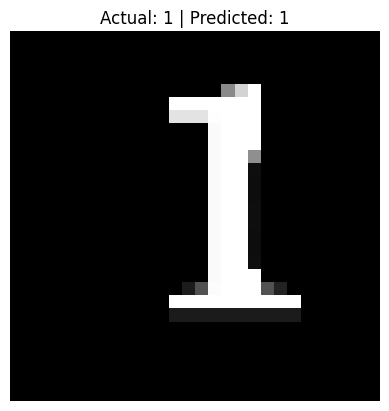

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


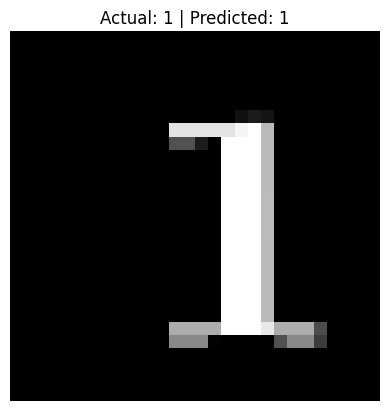

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


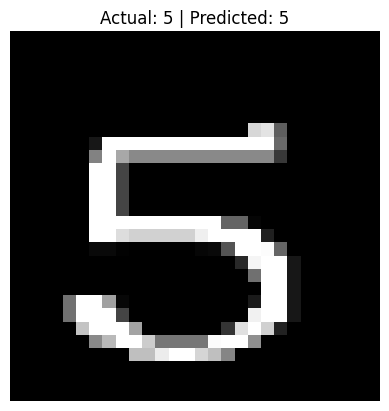

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


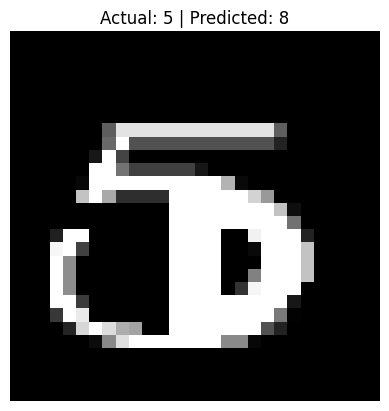

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


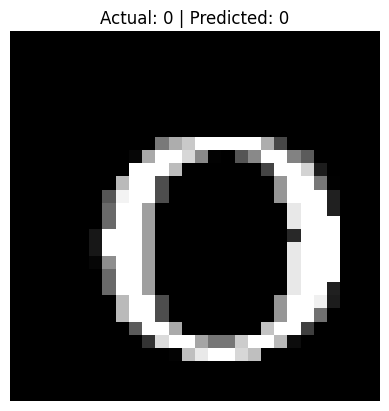

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


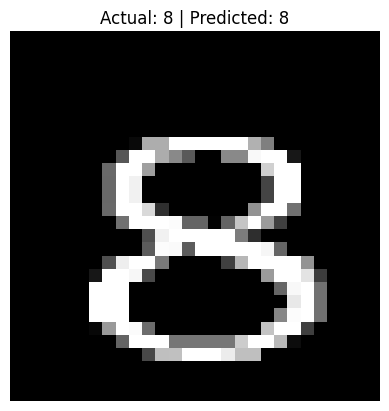

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


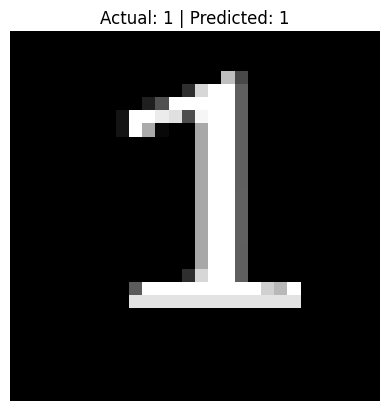

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


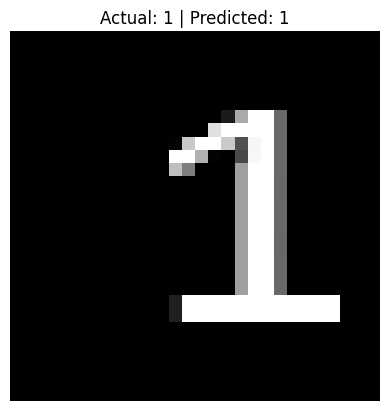

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


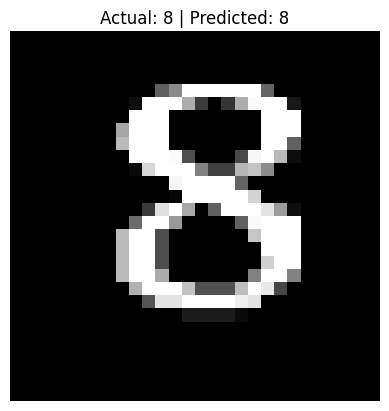

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


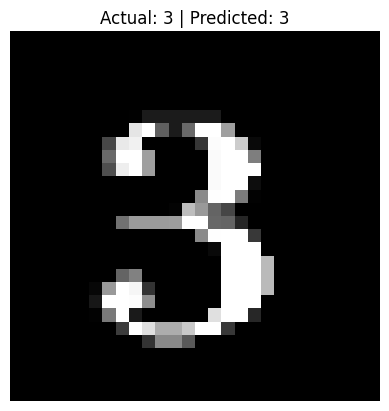

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


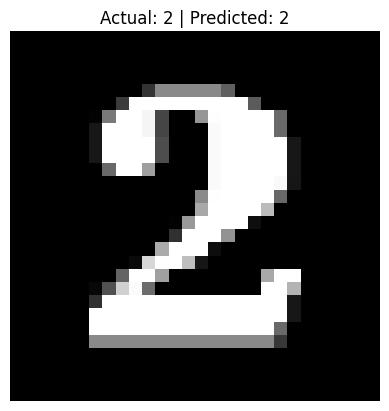

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


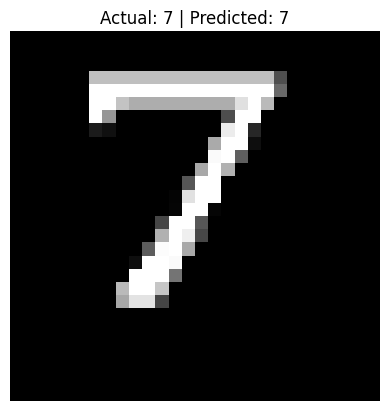

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


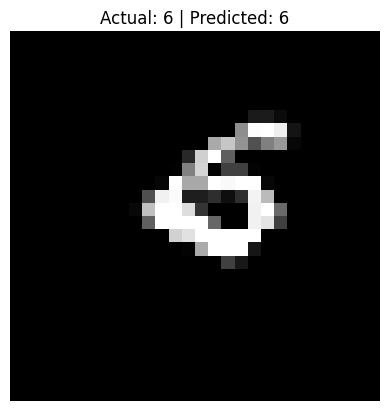

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


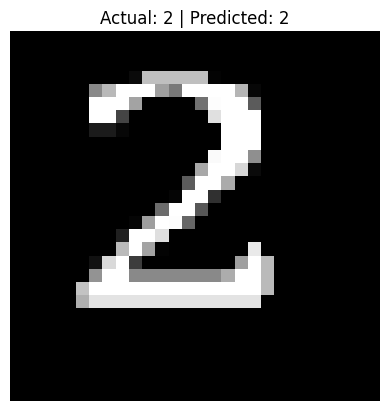

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


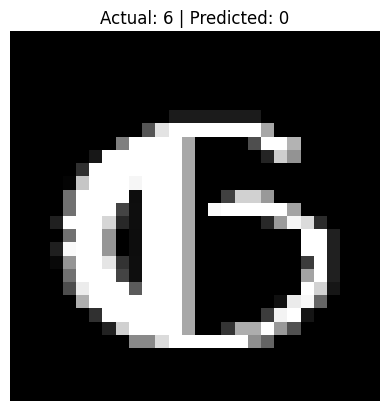

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


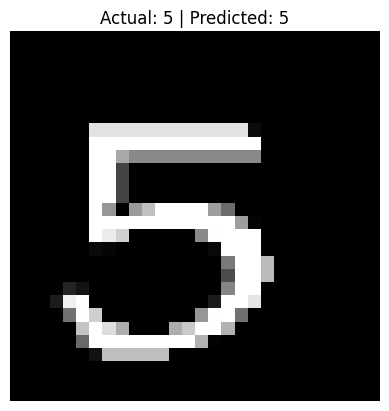

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


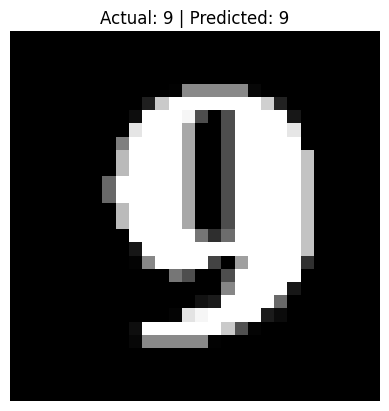

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


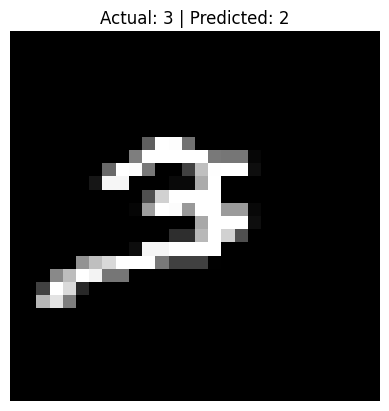

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


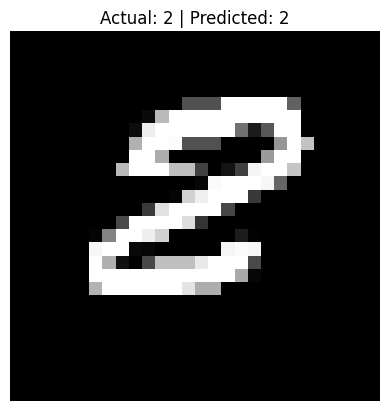

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


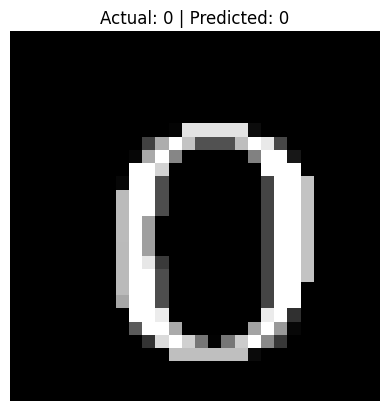

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


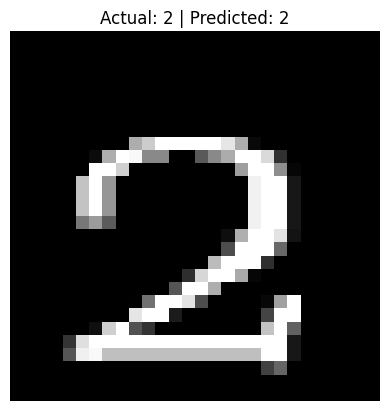

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


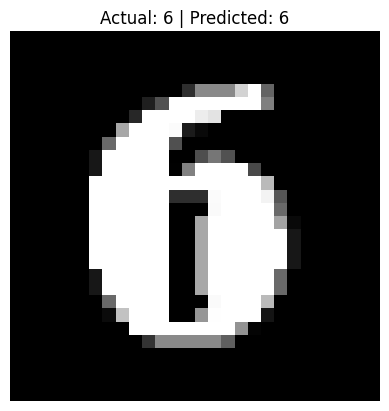

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


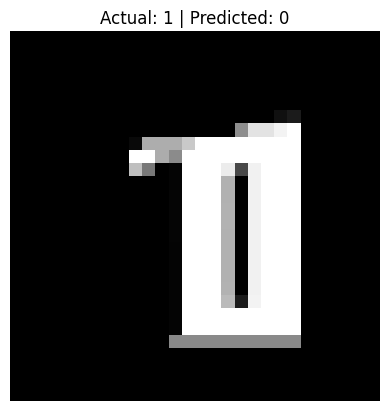

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


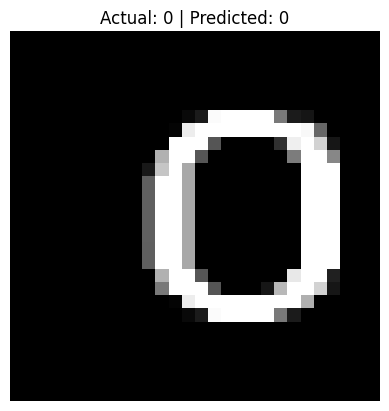

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


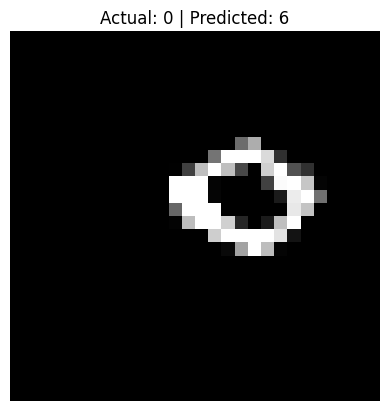

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


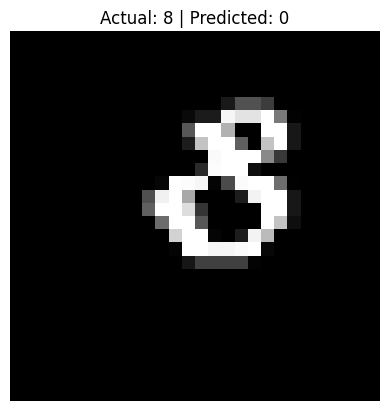

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


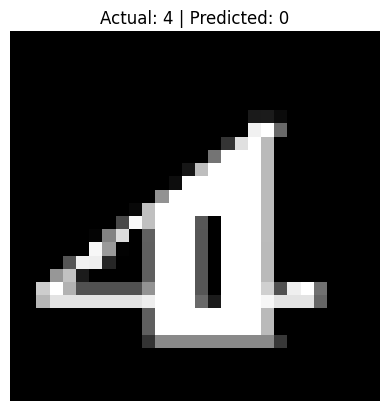

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


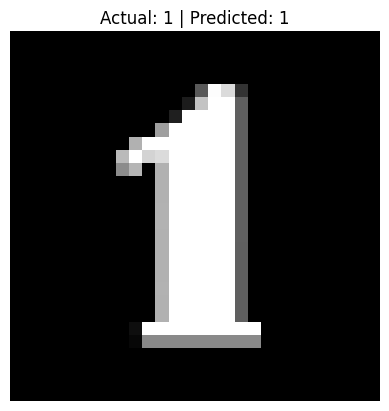

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


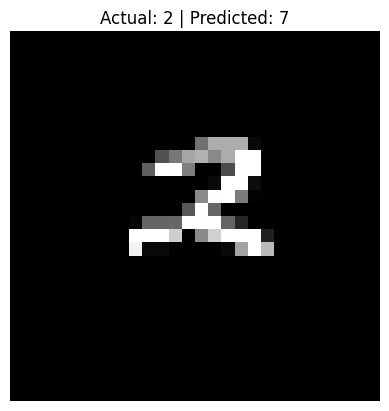

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


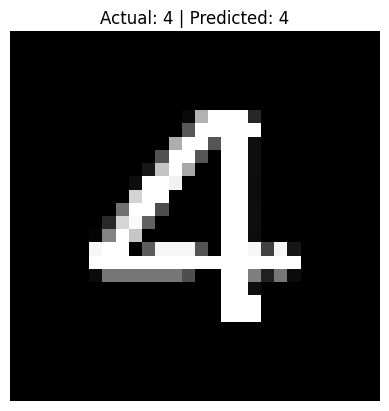

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


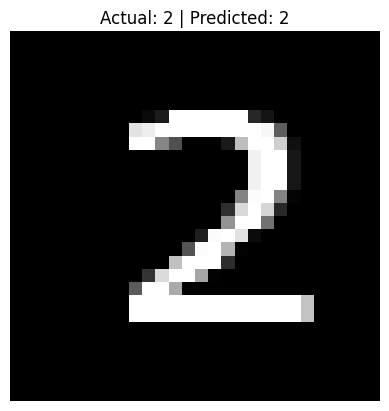

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


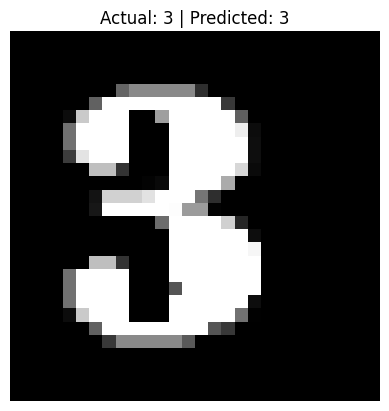

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


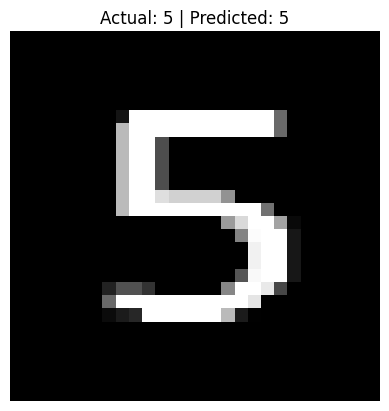

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


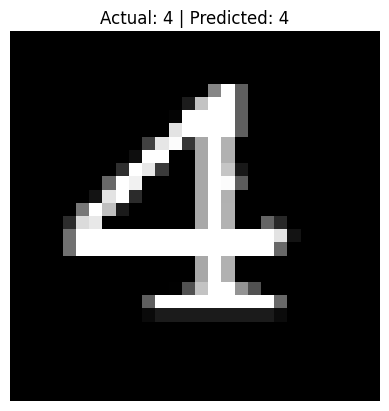

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


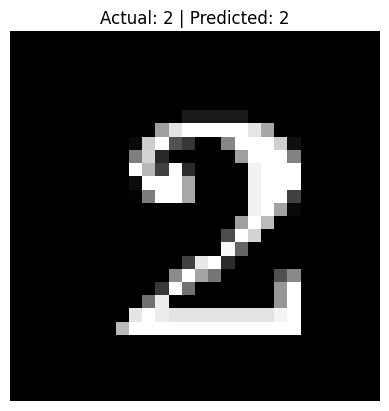

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


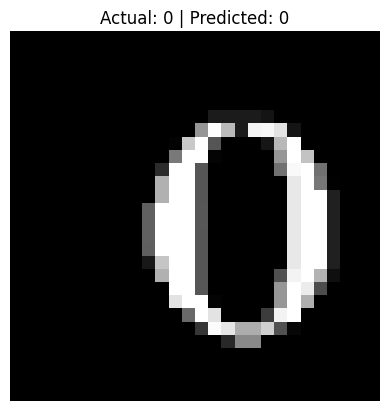

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


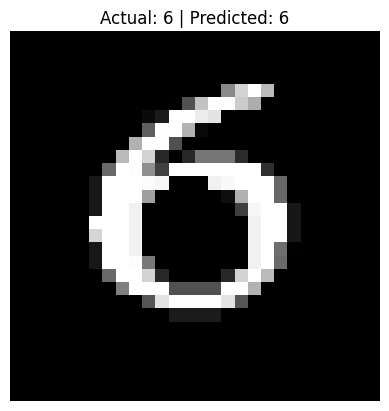

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


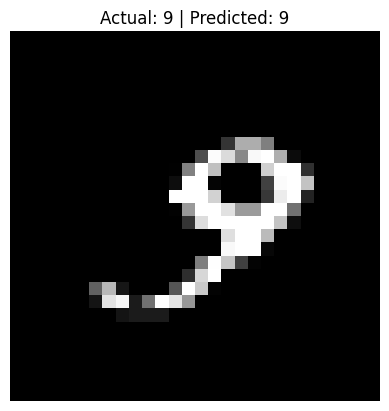

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


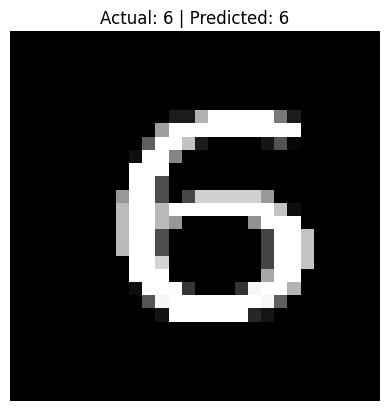

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


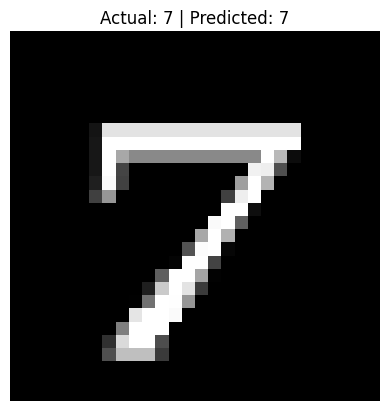

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


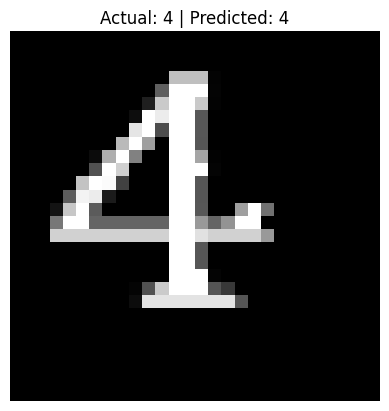

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


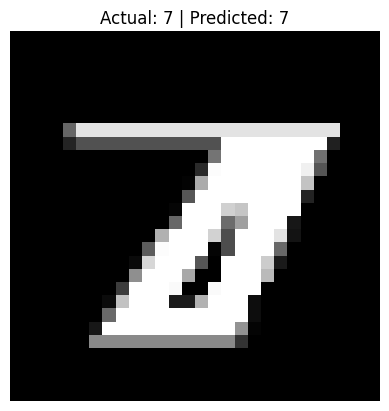

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


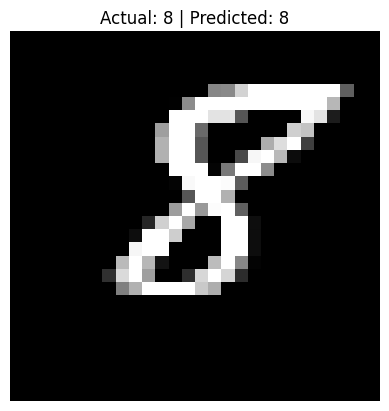

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


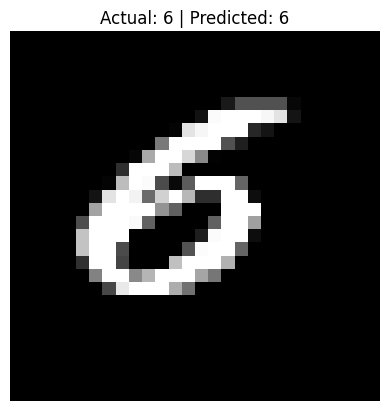

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


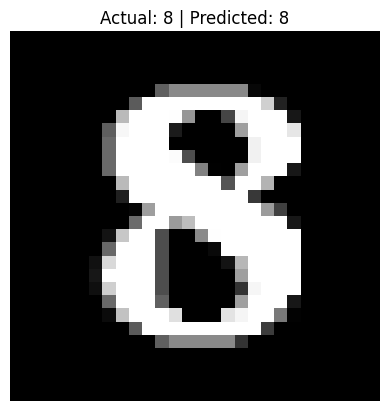

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


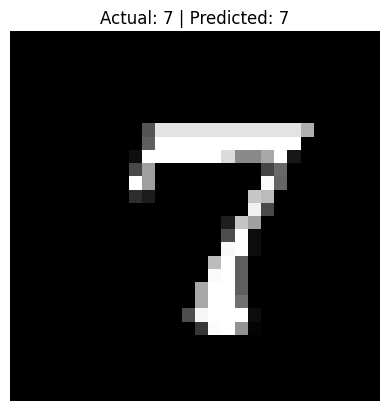

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


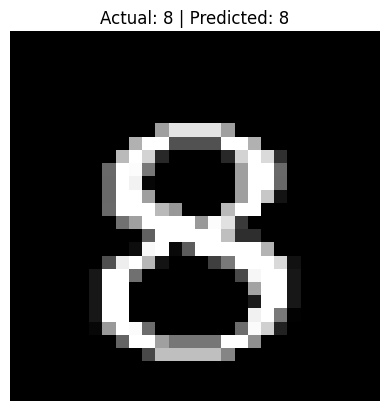

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


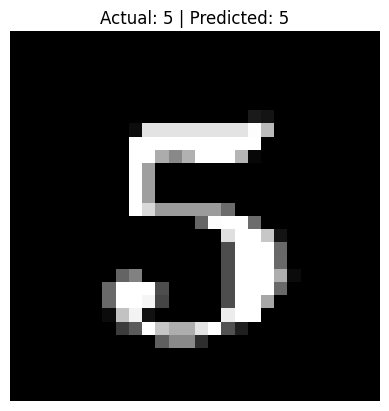

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


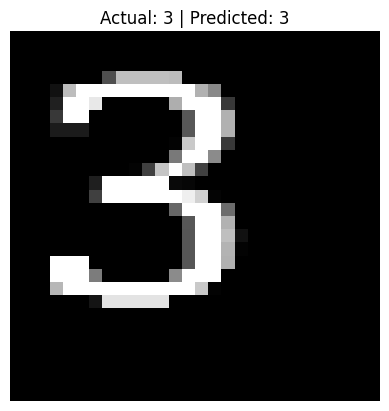

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


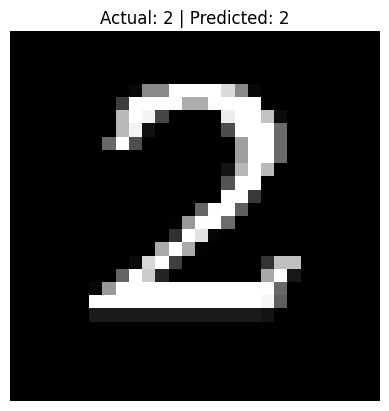

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


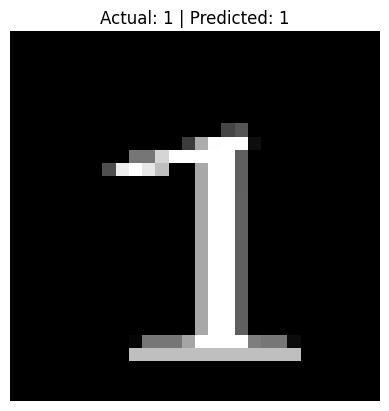

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


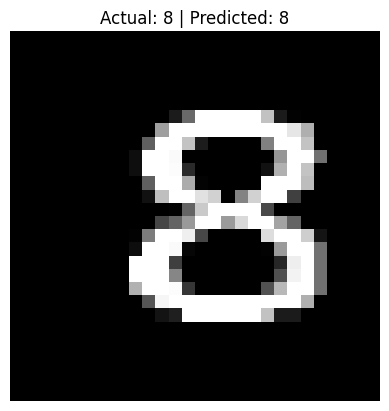

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


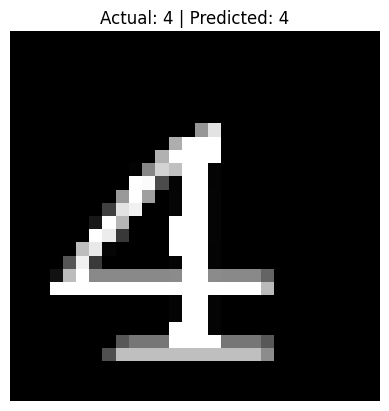

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


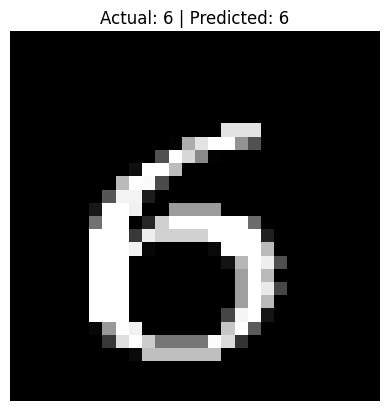

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


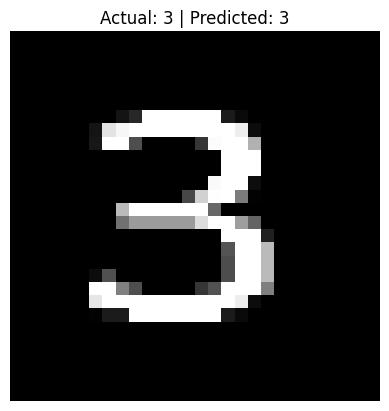

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


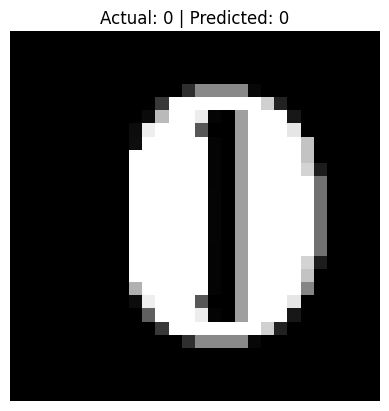

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


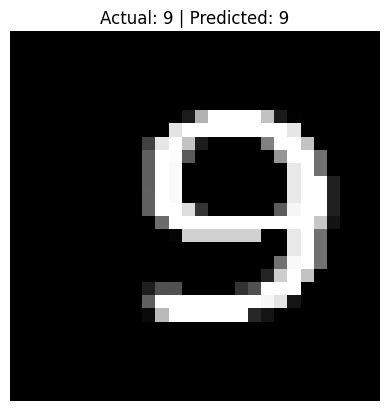

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


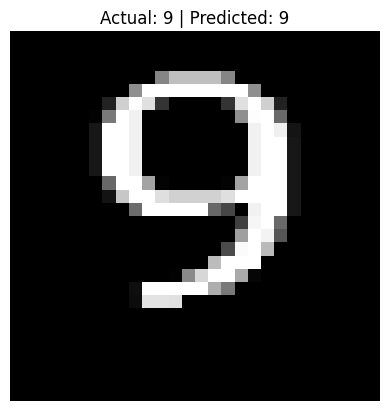

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


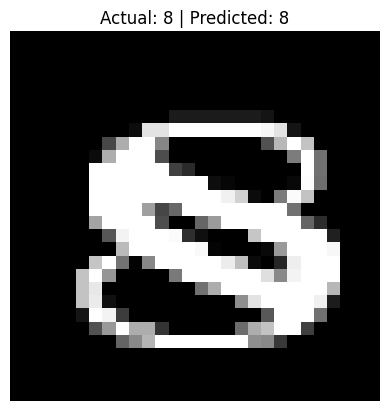

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


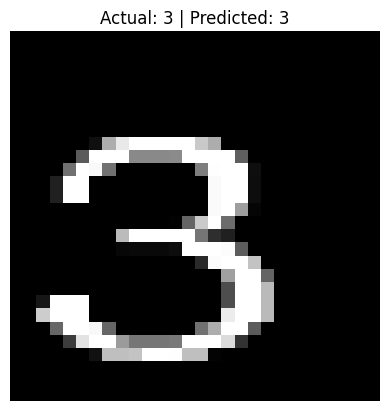

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


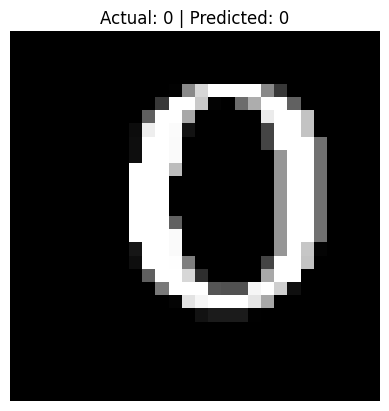

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


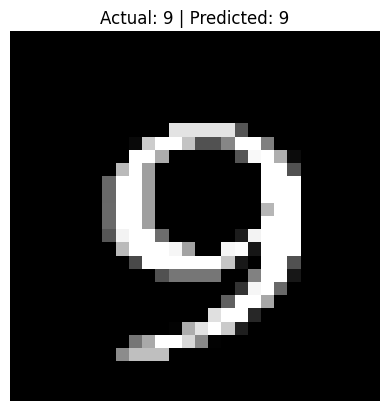

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


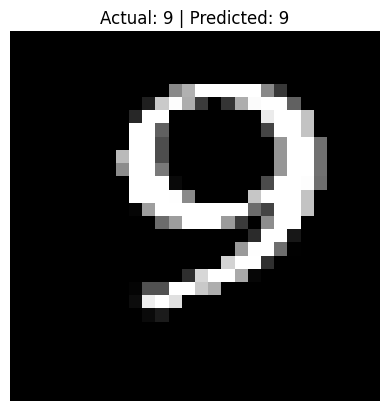

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


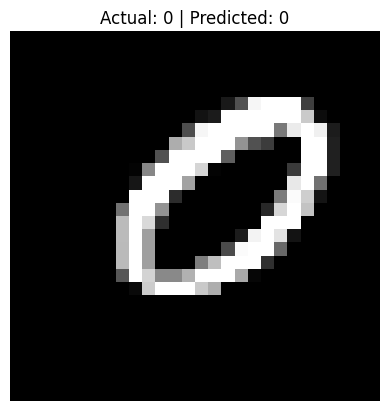

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


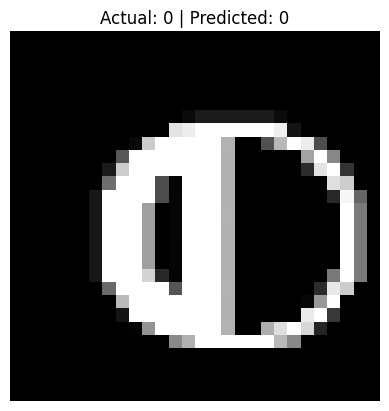

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


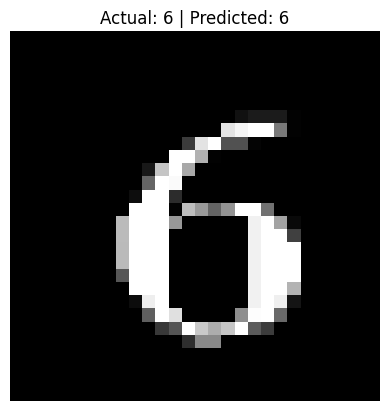

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


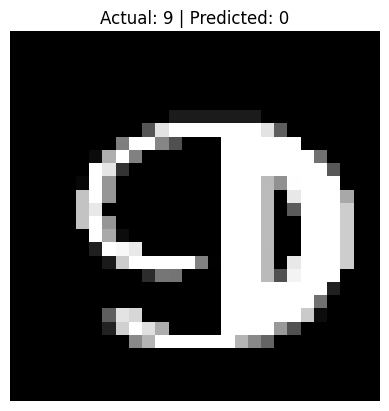

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


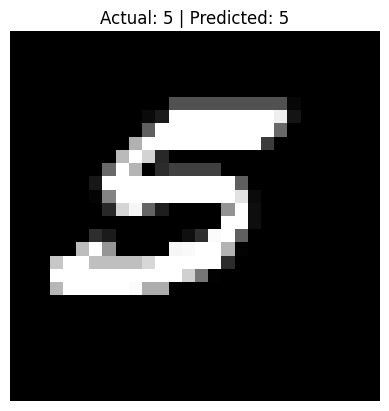

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


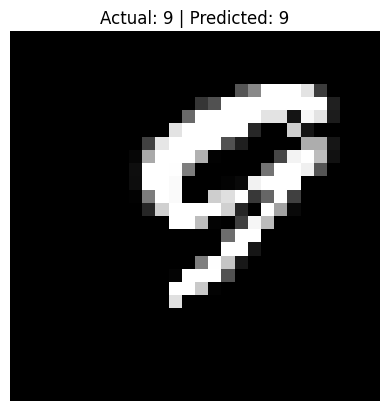

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


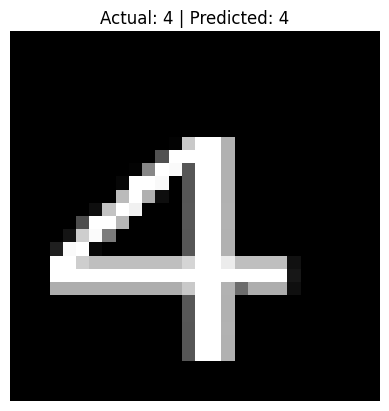

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


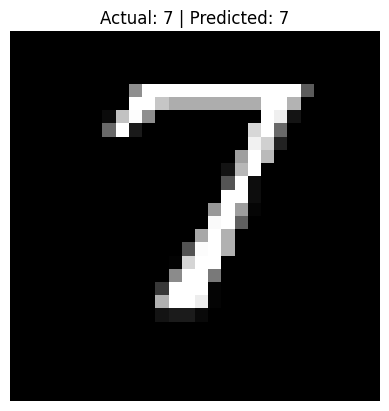

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


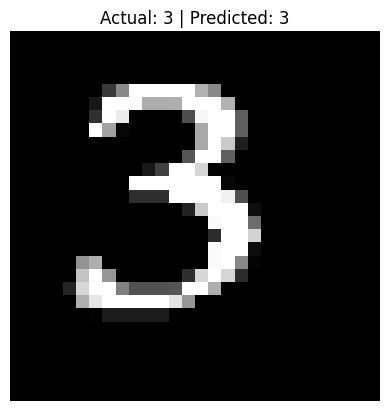

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


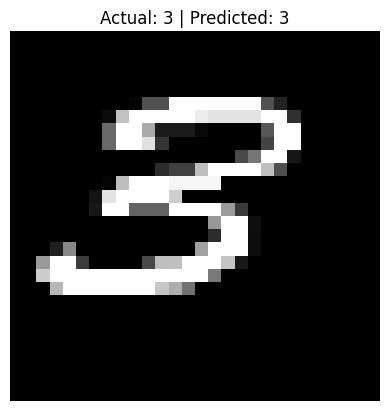

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


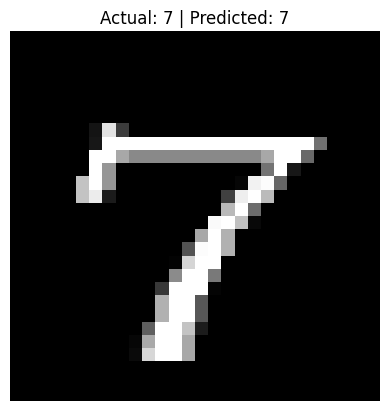

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


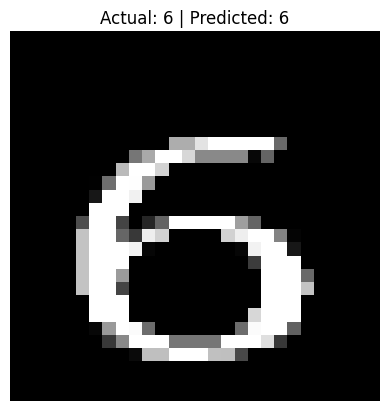

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


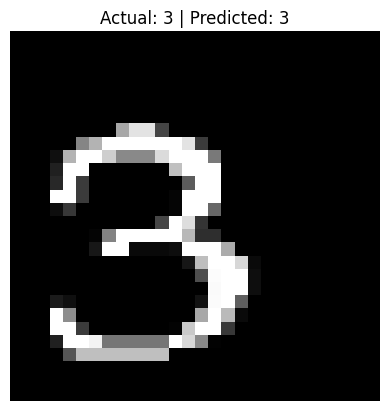

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


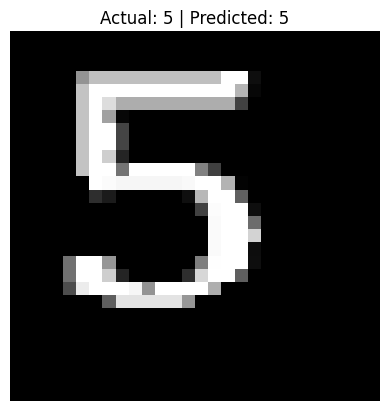

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


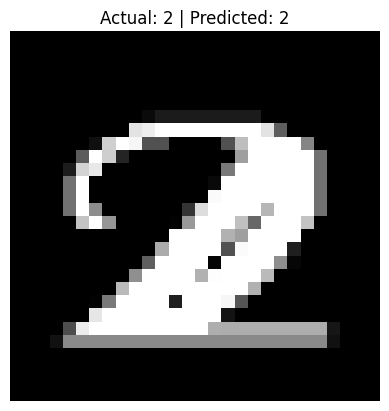


Model Accuracy on Uploaded Images: 87.00%


In [12]:
# Load trained model
model = tf.keras.models.load_model("mnist_cnn_t4_optimized.h5")

# Function to preprocess images before feeding into CNN
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

    # Adaptive Thresholding for better contrast
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY_INV, 11, 2)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Normalize and reshape for CNN
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    return img

# Predict function
def predict_images(folder_path):
    correct = 0
    total = 0
    actual_labels = []
    predicted_labels = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Extract actual label from filename
        # Assuming filename is "Slice xx.png" where the ones digit of xx is the label
        try:
            # Extract the xx part from the filename
            slice_number_str = img_name.split('.')[0].split(' ')[1]
            # Get the ones digit of xx
            actual_label = int(slice_number_str[-1])
        except (IndexError, ValueError):
            print(f"Skipping file {img_name} due to invalid filename format.")
            continue

        actual_labels.append(actual_label)

        # Preprocess image
        img = preprocess_image(img_path)

        # Predict using CNN
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)
        predicted_labels.append(predicted_label)

        # Check if prediction is correct
        if predicted_label == actual_label:
            correct += 1
        total += 1

        # Display image with Actual vs Predicted label
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(f'Actual: {actual_label} | Predicted: {predicted_label}')
        plt.axis('off')
        plt.show()

    # Calculate accuracy
    accuracy = (correct / total) * 100
    print(f"\nModel Accuracy on Uploaded Images: {accuracy:.2f}%")

    return accuracy

# Run predictions and calculate accuracy
accuracy = predict_images(image_folder)

In [13]:
print(f"Final Accuracy on Uploaded Dataset: {accuracy:.2f}%")


Final Accuracy on Uploaded Dataset: 87.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

<ipython-input-15-9a3bece75533>:75: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-9a3bece75533>:75: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


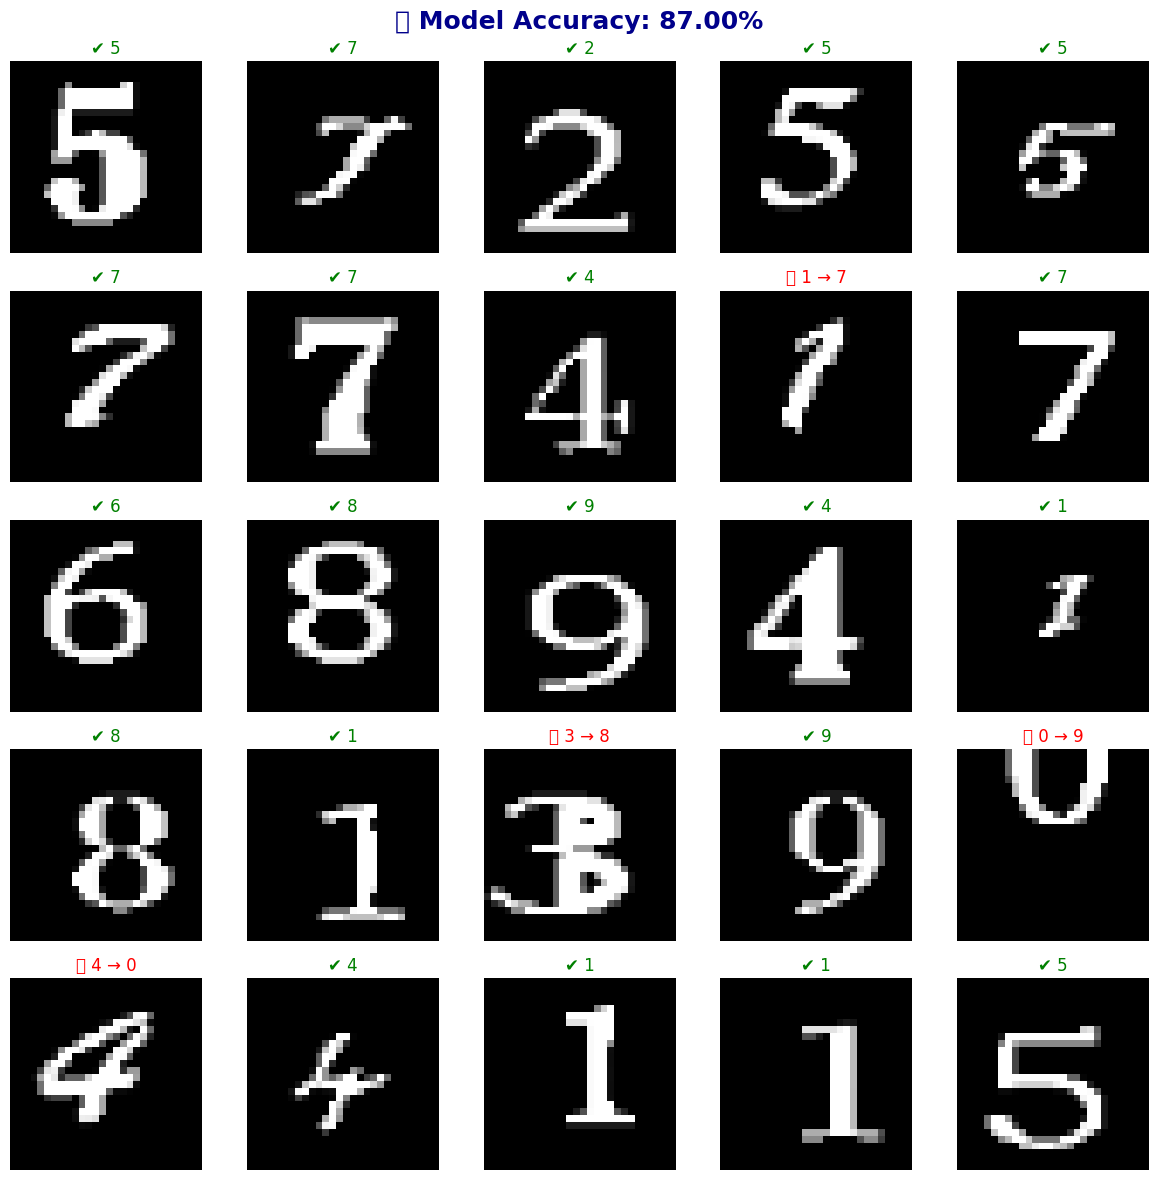

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Function to preprocess images before feeding into CNN
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

    # Adaptive Thresholding for better contrast
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY_INV, 11, 2)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Normalize and reshape for CNN
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    return img

# Function to visualize predictions aesthetically
def visualize_predictions(folder_path, model):
    correct = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    images = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Extract actual label from filename
        try:
            slice_number_str = img_name.split('.')[0].split(' ')[1]
            actual_label = int(slice_number_str[-1])
        except (IndexError, ValueError):
            print(f"Skipping file {img_name} due to invalid filename format.")
            continue

        actual_labels.append(actual_label)

        # Preprocess image
        img = preprocess_image(img_path)

        # Predict using CNN
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)
        predicted_labels.append(predicted_label)

        # Check if prediction is correct
        if predicted_label == actual_label:
            correct += 1
        total += 1

        # Store image & labels for visualization
        images.append((img.reshape(28, 28), actual_label, predicted_label))

    # Calculate accuracy
    accuracy = (correct / total) * 100

    # 📌 Create a 5x5 grid of images
    fig, axes = plt.subplots(5, 5, figsize=(12, 12))
    fig.suptitle(f"📊 Model Accuracy: {accuracy:.2f}%", fontsize=18, fontweight='bold', color='darkblue')

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            img, actual, predicted = images[i]
            ax.imshow(img, cmap='gray')
            ax.set_title(f"✔ {actual}" if actual == predicted else f"❌ {actual} → {predicted}",
                         fontsize=12, color='green' if actual == predicted else 'red')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize predictions
visualize_predictions(image_folder, model)
